In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import math
import matplotlib.pyplot as plt
import numpy as np
import io
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/spotify_songs-1.csv'
df2 = pd.read_csv(url)

In [ ]:
df2.shape

(19140, 16)

In [ ]:
df2.isnull().sum(axis = 0)

track_name            686
track_id              686
track_artist          686
playlist_id           686
track_popularity      686
instrumentalness      686
loudness              686
key                   686
speechiness           686
acousticness          686
danceability          686
liveness              686
tempo                 686
energy                686
valence               686
emotion             17336
dtype: int64

In [ ]:
#url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/Emotion_Labels.csv'
#df3 = pd.read_csv(url)

In [ ]:
#df4 = pd.merge(df2,df3,on='track_id')
#df4 = df2.drop(['Unnamed: 19'], axis=1)
df4=df2

In [ ]:
df4 = df4.dropna()
df4.shape

(1804, 16)

In [ ]:
df4['playlist_id'].value_counts()

3ykXidKLz1eYPvuGoFlD1e    17
37i9dQZF1DWUFmyho2wkQU    15
4NlAd9NpIa92IjErMyAriM    13
7nHgmv7uyIA1KHj6qTttjH    12
44bkJI1QGkT2O0GYJSsbkp    12
                          ..
37i9dQZF1DWVT93EW7kPT9     1
37i9dQZF1DWWQRwui0ExPn     1
2JPzPB9jnvJLAYtmCbvZy8     1
3kysJw7lvVwSoOaL0KyW94     1
5ifDekrUt5lbSIMTSzNNqB     1
Name: playlist_id, Length: 413, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df11 = df2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
cols = ['language', 'playlist_genre']
#df11[cols] = df11[cols].apply(LabelEncoder().fit_transform)

df12 = df2.set_index('track_name')

In [ ]:
testdf = df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]
testdf1 =  df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C'])]
testdf2 = df4[df4['playlist_id'].isin(['3ykXidKLz1eYPvuGoFlD1e'])]
testdf3 = df4[df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ'])]

In [ ]:
testdf1_1 = testdf1.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf2_1 = testdf2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf3_1 = testdf3.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)

In [ ]:
df5 = df4[~df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df5 = df4.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
df5['emotion'] = df5['emotion'].astype(int)

In [ ]:
#df5.head(2)

In [ ]:
#cols = ['language', 'playlist_genre']
#df5[cols] = df5[cols].apply(LabelEncoder().fit_transform)

In [ ]:
df11 = df5

In [ ]:
df11['track_name'] = df4['track_name']
df5 = df5.drop(['track_name'], axis=1)

In [ ]:
df12 = df11.set_index('track_name')

In [ ]:
#testdf1_1[cols] = testdf1_1[cols].apply(LabelEncoder().fit_transform)
#testdf2_1[cols] = testdf2_1[cols].apply(LabelEncoder().fit_transform)
#testdf3_1[cols] = testdf3_1[cols].apply(LabelEncoder().fit_transform)

In [ ]:
X, y = df5.iloc[:, :-1], df5.iloc[:, -1]
X.shape

(1804, 11)

In [ ]:
#strategy = {1:200, 2:120, 3:150, 4:100, 5:150,6:120, 7:70, 8:45 ,9:45 ,10:40}
#oversample = SMOTE(sampling_strategy=strategy)
#X, y = oversample.fit_resample(X, y)
# summarize distribution
#counter = Counter(y)
#for k,v in counter.items():
#	per = v / len(y) * 100
#	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
#pyplot.bar(counter.keys(), counter.values())
#pyplot.show()

In [ ]:
#df6 = pd.DataFrame(X)
#df6['emotion'] = y
#df7 = df6.sample(frac=1)
#df5 = df5.dropna()

In [ ]:
df5.shape
scaler = MinMaxScaler()

In [ ]:
df5['emotion'].value_counts()

1     609
3     228
6     215
2     165
7     150
5     138
4     126
8      64
10     57
9      52
Name: emotion, dtype: int64

In [ ]:
train_data_001 = df5.iloc[:1600,4:]
train_data_01 = pd.DataFrame(scaler.fit_transform(train_data_001))
train_data_length = len(train_data_01)
df5.head()

,track_popularity,instrumentalness,loudness,key,speechiness,acousticness,danceability,liveness,tempo,energy,valence,emotion
0,41.0,0.01170,10.068,2.0,0.0236,0.27900,0.682,0.0887,97.091,0.401,0.566,6
1,28.0,0.00994,4.739,9.0,0.0442,0.01170,0.303,0.3470,135.225,0.880,0.404,1
2,0.0,0.00723,7.504,6.0,0.2160,0.00432,0.845,0.4890,111.904,0.652,0.650,10
3,41.0,0.00000,5.819,5.0,0.0341,0.68900,0.425,0.0664,118.593,0.378,0.405,6
4,65.0,0.00000,1.993,9.0,0.0409,0.03700,0.760,0.1380,130.018,0.887,0.240,7


In [ ]:
df5.shape

(1804, 12)

In [ ]:
train_data_001.columns

Index(['speechiness', 'acousticness', 'danceability', 'liveness', 'tempo',
       'energy', 'valence', 'emotion'],
      dtype='object')

In [ ]:
testdf1_2 = testdf1_1.iloc[:1600,4:]
testdf2_2 = testdf2_1.iloc[:1600,4:]
testdf3_2 = testdf3_1.iloc[:1600,4:]
df13 = df12.iloc[:1600,4:]

In [ ]:
df13.columns

Index(['speechiness', 'acousticness', 'danceability', 'liveness', 'tempo',
       'energy', 'valence', 'emotion'],
      dtype='object')

In [ ]:
train_data = torch.tensor(train_data_01.values.astype(np.float32))

In [ ]:
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [ ]:
batch_size = 40
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [ ]:
discriminator = Discriminator()

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 40),
            nn.ReLU(),
            nn.Linear(40, 80),
            nn.ReLU(),
            nn.Linear(80, 8),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [ ]:
lr = 0.001
num_epochs = 600
loss_function = nn.BCELoss()

In [ ]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
# list for final generated samples
final_generated_samples=[]
final_generated_samples_list=[]
losses_g =[]
losses_d = []
labels = []
pred = []
true = []

In [ ]:
#len(labels[0])

In [ ]:

for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.rand((batch_size, 8))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()


        # Data for training the generator
        latent_space_samples = torch.rand((batch_size, 8))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        losses_g.append(loss_generator)
        losses_d.append(loss_discriminator)

        labels.append(all_samples_labels)
        pred.append(output_discriminator)
        true.append(all_samples)

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            final_generated_samples.append(generated_samples[0])
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            

Epoch: 0 Loss D.: 1.140141248703003
Epoch: 0 Loss G.: 1.249300479888916
Epoch: 10 Loss D.: 0.19869467616081238
Epoch: 10 Loss G.: 3.087642192840576
Epoch: 20 Loss D.: 0.5001350045204163
Epoch: 20 Loss G.: 0.8027358055114746
Epoch: 30 Loss D.: 0.3226293623447418
Epoch: 30 Loss G.: 1.2017114162445068
Epoch: 40 Loss D.: 0.5373619794845581
Epoch: 40 Loss G.: 0.8015209436416626
Epoch: 50 Loss D.: 0.6689475774765015
Epoch: 50 Loss G.: 0.733837366104126
Epoch: 60 Loss D.: 0.6975902318954468
Epoch: 60 Loss G.: 0.777030348777771
Epoch: 70 Loss D.: 0.7291556596755981
Epoch: 70 Loss G.: 0.6845043897628784
Epoch: 80 Loss D.: 0.6676898002624512
Epoch: 80 Loss G.: 0.848962664604187
Epoch: 90 Loss D.: 0.7463034391403198
Epoch: 90 Loss G.: 0.748918890953064
Epoch: 100 Loss D.: 0.6448470950126648
Epoch: 100 Loss G.: 0.7332197427749634
Epoch: 110 Loss D.: 0.6063539981842041
Epoch: 110 Loss G.: 0.8706730604171753
Epoch: 120 Loss D.: 0.6511262059211731
Epoch: 120 Loss G.: 0.9415114521980286
Epoch: 130 Los

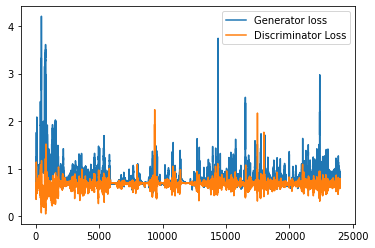

In [ ]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.show()

In [ ]:
# make a dataframe for sample list
for i in final_generated_samples:
  a = i.detach().numpy()
  final_generated_samples_list.append(a)
final_generated_samples_df = pd.DataFrame(final_generated_samples_list)

In [ ]:
latent_space_samples[:10]

tensor([[0.5597, 0.7222, 0.0246, 0.7881, 0.5764, 0.8723, 0.2556, 0.8459],
        [0.5711, 0.0549, 0.6994, 0.7004, 0.2471, 0.4058, 0.2898, 0.3827],
        [0.1088, 0.5167, 0.2784, 0.9062, 0.8008, 0.8147, 0.2172, 0.0346],
        [0.6953, 0.3183, 0.2391, 0.4596, 0.3527, 0.0544, 0.6472, 0.4276],
        [0.7900, 0.4049, 0.5126, 0.7385, 0.7774, 0.9530, 0.5468, 0.5475],
        [0.7231, 0.1877, 0.1518, 0.3517, 0.8369, 0.8111, 0.5639, 0.1773],
        [0.3629, 0.4855, 0.4569, 0.6224, 0.4142, 0.5089, 0.0169, 0.3564],
        [0.7756, 0.6584, 0.5914, 0.5885, 0.6702, 0.1066, 0.9760, 0.5905],
        [0.4241, 0.3724, 0.0348, 0.1341, 0.4898, 0.5674, 0.9813, 0.7423],
        [0.2887, 0.8415, 0.9420, 0.4821, 0.2535, 0.2211, 0.1387, 0.3414]])

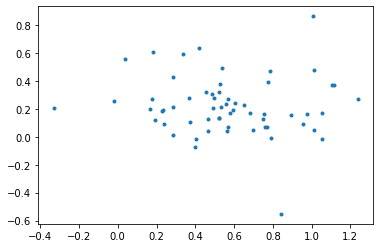

In [ ]:
#plot of two variables from generated samples
plt.plot(final_generated_samples_df.iloc[:, 6], 
         final_generated_samples_df.iloc[:, 3], ".")

In [ ]:
from scipy.spatial import distance

In [ ]:
float_x = real_samples[0].double()

In [ ]:
float_x = list(float_x.numpy())

In [ ]:
# Cosine similarity
def square_rooted(x):
   return round(math.sqrt(sum([a*a for a in x])),3)
  
def cosine_similarity(x,y):
 numerator = sum(a*b for a,b in zip(x,y))
 denominator = square_rooted(x)*square_rooted(y)
 return round(numerator/float(denominator),3)
  
print(cosine_similarity(final_generated_samples_df[0],float_x))

0.238


In [ ]:
#Jaccard similarity
from math import*
  
def jaccard_similarity(x,y):
 intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
 union_cardinality = len(set.union(*[set(x), set(y)]))
 return intersection_cardinality/float(union_cardinality)
print(jaccard_similarity([0,1,2,5,6],[0,2,3,5,7,9]))

0.375


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity

In [ ]:
df9 = pd.DataFrame(scaler.inverse_transform(final_generated_samples_df))
df10 = pd.DataFrame(scaler.inverse_transform(train_data_01))

In [ ]:
generated_vals2=[]
for i, j in df9.iterrows():
  generated_vals2.append(j.values)

generated_vals3 = generated_vals2[:10]

train_data_vals2=[]
for i, j in train_data_001.iterrows():
  train_data_vals2.append(j.values)


In [ ]:
def cos_similarity(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cos.append(rec_score)
  rec_idx = df13.index[rec_index]
  cos_name.append(rec_idx)
  rec_len = len(recommended)
  results1.append(['index:',rec_idx,'; cos sim:',rec_score])

In [ ]:
def euclid_similarity(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_euc.append(rec_score)
  rec_idx = df13.index[rec_index]
  euc_name.append(rec_idx)
  rec_len = len(recommended)
  results2.append(['index:',rec_idx,'; euclid sim:',rec_score])

In [ ]:
dst = distance.euclidean(final_generated_samples_df.iloc[0,:].values,float_x)
print('Euclidean distance: %.3f' % dst)

Euclidean distance: 1.228


In [ ]:
# pick recommendations with cosine similarity
results1 =[]
cos_name =[]
rec_cos = []
for i in generated_vals2:
  a = cos_similarity(i,train_data_vals2)

In [ ]:
cols2 = ['language']
cos_rec =  df4[df4['track_name'].isin(cos_name)]
cos_rec2 = cos_rec.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
#cos_rec2[cols2] = cos_rec2[cols2].apply(LabelEncoder().fit_transform)
cos_rec3 = cos_rec2.iloc[:1600,4:]

In [ ]:
cos_rec4=[]
for i, j in cos_rec3.iterrows():
  cos_rec4.append(j.values)

In [ ]:
cos_rec3['track_name'] = df4['track_name']
cos_rec5 = cos_rec3.set_index('track_name')

In [ ]:
rec_cose=[]
for i in rec_cos:
  rec_cose.append(i[0][0])

In [ ]:
# pick recommendations with euclidean similarity
results2 =[]
euc_name =[]
rec_euc = []
for i in generated_vals2:
  a = euclid_similarity(i,train_data_vals2)

In [ ]:
euc_rec =  df4[df4['track_name'].isin(euc_name)]
euc_rec2 = euc_rec.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
#euc_rec2[cols2] = euc_rec2[cols2].apply(LabelEncoder().fit_transform)
euc_rec3 = euc_rec2.iloc[:1600,4:]

In [ ]:
euc_rec4=[]
for i, j in euc_rec3.iterrows():
  euc_rec4.append(j.values)

In [ ]:
euc_rec3['track_name'] = df4['track_name']
euc_rec5 = euc_rec3.set_index('track_name')

In [ ]:
testdf1_3 = testdf1_2
testdf1_3['track_name'] = testdf1['track_name']
testdf1_3 = testdf1_3.set_index('track_name')

testdf2_3 = testdf2_2
testdf2_3['track_name'] = testdf2['track_name']
testdf2_3 = testdf2_3.set_index('track_name')

testdf3_3 = testdf3_2
testdf3_3['track_name'] = testdf3['track_name']
testdf3_3 = testdf3_3.set_index('track_name')

In [ ]:
test_data1 = testdf1_3.values
test_data2 = testdf2_3.values
test_data3 = testdf3_3.values

In [ ]:
def cos_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT1.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  cost1_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT1.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  euct1_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [ ]:
#compare recomendations to test subjects
cost1_name = []
rec_cosT1 = []
for i in test_data1:
  a = cos_similarity_t1(i,cos_rec4)

len train data: 61 ; index: Fvck Luv ; cos sim: [[0.99999334]]
len train data: 61 ; index: Be As You Are - JordanXL Remix ; cos sim: [[0.99999584]]
len train data: 61 ; index: The High Road ; cos sim: [[0.99999223]]
len train data: 61 ; index: Eye of the Tiger ; cos sim: [[0.99999666]]
len train data: 61 ; index: Be As You Are - JordanXL Remix ; cos sim: [[0.99998546]]
len train data: 61 ; index: Iggin' Me ; cos sim: [[0.9999924]]
len train data: 61 ; index: Iggin' Me ; cos sim: [[0.99999618]]
len train data: 61 ; index: GANG ; cos sim: [[0.99999726]]
len train data: 61 ; index: Fvck Luv ; cos sim: [[0.99999737]]
len train data: 61 ; index: The Reason (Sean Cook Remix) ; cos sim: [[0.99999258]]


In [ ]:
rec_coseT1=[]
for i in rec_cosT1:
  rec_coseT1.append(i[0][0])

In [ ]:
euc_rec3.shape

(60, 9)

In [ ]:
euct1_name = []
rec_eucT1 = []
for i in test_data1:
  a = euclid_similarity_t1(i,euc_rec4)

len train data: 60 ; index: Show Me Love ; euclid sim: 2.1240837577647413
len train data: 60 ; index: Big Area ; euclid sim: 0.7144277430223517
len train data: 60 ; index: Blood - Remix ; euclid sim: 4.212957166884081
len train data: 60 ; index: Loudspeaker ; euclid sim: 1.4876026821702035
len train data: 60 ; index: All I Want for Christmas Is You ; euclid sim: 2.1586056934975457
len train data: 60 ; index: It's Been Awhile ; euclid sim: 0.9548193243226628
len train data: 60 ; index: They Don't Know ; euclid sim: 2.3028130818631314
len train data: 60 ; index: Jungle ; euclid sim: 0.0
len train data: 60 ; index: Saudi Arabi Money Rich - Babos Remix ; euclid sim: 7.129907868268702
len train data: 60 ; index: One Dance ; euclid sim: 1.9877990850184077


In [ ]:
def cos_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT2.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  cost2_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT2.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  euct2_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [ ]:
#compare recomendations to test subjects
cost2_name = []
rec_cosT2 = []
for i in test_data2:
  a = cos_similarity_t2(i,cos_rec4)

len train data: 61 ; index: Eye of the Tiger ; cos sim: [[0.99998505]]
len train data: 61 ; index: Mi Gente (feat. BeyoncÃ©) ; cos sim: [[0.99999618]]
len train data: 61 ; index: Te Doy Mi Vida ; cos sim: [[0.99999544]]
len train data: 61 ; index: Mi Gente (feat. BeyoncÃ©) ; cos sim: [[0.99999615]]
len train data: 61 ; index: Stranger ; cos sim: [[0.99998039]]
len train data: 61 ; index: Mi Gente (feat. BeyoncÃ©) ; cos sim: [[0.99999502]]
len train data: 61 ; index: High Fashion (feat. Mustard) ; cos sim: [[0.99999562]]
len train data: 61 ; index: Si Me Gano Un Grammy ; cos sim: [[0.99998044]]
len train data: 61 ; index: Bette Davis Eyes ; cos sim: [[0.99999783]]
len train data: 61 ; index: Cha Cha Cha ; cos sim: [[1.]]
len train data: 61 ; index: Eye of the Tiger ; cos sim: [[0.99998628]]
len train data: 61 ; index: Bette Davis Eyes ; cos sim: [[0.99999755]]
len train data: 61 ; index: Changes ; cos sim: [[0.99999315]]
len train data: 61 ; index: High Fashion (feat. Mustard) ; cos sim

In [ ]:
rec_coseT2=[]
for i in rec_cosT2:
  rec_coseT2.append(i[0][0])

In [ ]:
euct2_name =[]
rec_eucT2 = []
for i in test_data2:
  a = euclid_similarity_t2(i,euc_rec4)

len train data: 60 ; index: Handful Of Gold ; euclid sim: 3.198965956367781
len train data: 60 ; index: Point of No Return ; euclid sim: 1.0429351801526254
len train data: 60 ; index: Asi Yo Soy ; euclid sim: 2.0956683158362517
len train data: 60 ; index: Miss You Much ; euclid sim: 0.0
len train data: 60 ; index: Touch'N You ; euclid sim: 2.1158037621670083
len train data: 60 ; index: One Dance ; euclid sim: 2.335136334349668
len train data: 60 ; index: Kiss Me ; euclid sim: 0.6497295899064472
len train data: 60 ; index: Switch ; euclid sim: 1.9970363951615875
len train data: 60 ; index: Point of No Return ; euclid sim: 1.5060683550224299
len train data: 60 ; index: Asi Yo Soy ; euclid sim: 1.7715454298436728
len train data: 60 ; index: Haven't Got Time for the Pain ; euclid sim: 2.3983951732147872
len train data: 60 ; index: Nails ; euclid sim: 1.452501104990976
len train data: 60 ; index: Fake Plastic Trees ; euclid sim: 3.2997775455324283
len train data: 60 ; index: One Dance ; euc

In [ ]:
def cos_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT3.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  cost3_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT3.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  euct3_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [ ]:
#compare recomendations to test subjects
cost3_name = []
rec_cosT3 = []
for i in test_data3:
  a = cos_similarity_t3(i,cos_rec4)

len train data: 61 ; index: Dance The Night Away ; cos sim: [[0.99999188]]
len train data: 61 ; index: Encanto ; cos sim: [[0.99999809]]
len train data: 61 ; index: The Reason (Sean Cook Remix) ; cos sim: [[0.9999955]]
len train data: 61 ; index: Be As You Are - JordanXL Remix ; cos sim: [[0.99999599]]
len train data: 61 ; index: Mi Gente (feat. BeyoncÃ©) ; cos sim: [[0.99999153]]
len train data: 61 ; index: Be As You Are - JordanXL Remix ; cos sim: [[0.99998541]]
len train data: 61 ; index: Mi Gente (feat. BeyoncÃ©) ; cos sim: [[0.99999518]]
len train data: 61 ; index: Intro ; cos sim: [[0.99997163]]
len train data: 61 ; index: Changes ; cos sim: [[0.99998068]]
len train data: 61 ; index: Rock Bottom ; cos sim: [[0.99999476]]
len train data: 61 ; index: Limestone ; cos sim: [[0.9999833]]


In [ ]:
rec_coseT3=[]
for i in rec_cosT3:
  rec_coseT3.append(i[0][0])

In [ ]:
euct3_name = []
rec_eucT3 = []
for i in test_data3:
  a = euclid_similarity_t3(i,euc_rec4)

len train data: 60 ; index: Treat You Better - Ashworth Remix ; euclid sim: 2.0987286056086494
len train data: 60 ; index: All on Me ; euclid sim: 0.48159602365466664
len train data: 60 ; index: One Dance ; euclid sim: 1.1523963686162977
len train data: 60 ; index: Saudi Arabi Money Rich - Babos Remix ; euclid sim: 1.095616621827633
len train data: 60 ; index: The Middle ; euclid sim: 2.049622892143826
len train data: 60 ; index: Sound of Madness ; euclid sim: 6.101418460377104
len train data: 60 ; index: Sektion (feat. Branco & Gilli) ; euclid sim: 1.0766788146889508
len train data: 60 ; index: Blessings ; euclid sim: 1.396004917613115
len train data: 60 ; index: Loudspeaker ; euclid sim: 0.0
len train data: 60 ; index: Fake Plastic Trees ; euclid sim: 2.497356760657162
len train data: 60 ; index: Blessings ; euclid sim: 2.6958400175084543


In [ ]:
rec_coseT1.extend(rec_coseT2)

In [ ]:
rec_coseT1.extend(rec_coseT3)

In [ ]:
print(rec_coseT1)

[0.9999933367519975, 0.9999958366135604, 0.9999922259097692, 0.9999966581333073, 0.9999854604195221, 0.9999923994309148, 0.9999961786436556, 0.9999972589924081, 0.9999973724917952, 0.9999925814315758, 0.9999850455244005, 0.999996180813148, 0.9999954444068863, 0.9999961513542712, 0.9999803920483779, 0.9999950197482327, 0.9999956159695195, 0.9999804386178313, 0.999997832791965, 1.0000000000000002, 0.9999862827251608, 0.9999975473013035, 0.999993154117715, 0.9999924188638883, 0.9999962847765244, 0.9999917183510276, 0.9999832627409282, 0.9999918833613036, 0.9999980913992829, 0.9999955022403022, 0.9999959871404412, 0.9999915254061487, 0.9999854056848291, 0.9999951753025962, 0.9999716310844874, 0.9999806755289424, 0.9999947570876672, 0.9999833041458615]


In [ ]:
rec_eucT1.extend(rec_eucT2)
rec_eucT1.extend(rec_eucT3)

In [ ]:
print(rec_eucT1)

[2.1240837577647413, 0.7144277430223517, 4.212957166884081, 1.4876026821702035, 2.1586056934975457, 0.9548193243226628, 2.3028130818631314, 0.0, 7.129907868268702, 1.9877990850184077, 3.198965956367781, 1.0429351801526254, 2.0956683158362517, 0.0, 2.1158037621670083, 2.335136334349668, 0.6497295899064472, 1.9970363951615875, 1.5060683550224299, 1.7715454298436728, 2.3983951732147872, 1.452501104990976, 3.2997775455324283, 2.0984377642427225, 5.032098157071262, 4.1571408131070084, 1.8037165998263185, 2.0987286056086494, 0.48159602365466664, 1.1523963686162977, 1.095616621827633, 2.049622892143826, 6.101418460377104, 1.0766788146889508, 1.396004917613115, 0.0, 2.497356760657162, 2.6958400175084543]


The two hypotheses for this particular two sample t-test are as follows:

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

Because the p-value of our test (0.0595) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean height of plants between the two populations is different.

In [ ]:
df1_rec =  df4[df4['track_name'].isin(euct1_name)]
df2_rec =  df4[df4['track_name'].isin(euct2_name)]
df3_rec =  df4[df4['track_name'].isin(euct3_name)]
dfc1_rec =  df4[df4['track_name'].isin(cost1_name)]
dfc2_rec =  df4[df4['track_name'].isin(cost2_name)]
dfc3_rec =  df4[df4['track_name'].isin(cost3_name)]

In [ ]:
testing37 = df1_rec.iloc[:,[0,2]]
testing37_dict = dict(zip(testing37.track_name, testing37.track_artist))
eucdf1 = pd.DataFrame(euct1_name)
eucdf1['artist'] = eucdf1[0].map(testing37_dict)
eucdf1

,0,artist
0,Show Me Love,Robin Schulz
1,Big Area,Then Jerico
2,Blood - Remix,Moonkey
3,Loudspeaker,MUNA
4,All I Want for Christmas Is You,Mariah Carey
5,It's Been Awhile,Staind
6,They Don't Know,Jon B.
7,Jungle,Tash Sultana
8,Saudi Arabi Money Rich - Babos Remix,Haftbefehl
9,One Dance,Drake


In [ ]:
testing38 = df2_rec.iloc[:,[0,2]]
testing38_dict = dict(zip(testing38.track_name, testing38.track_artist))
eucdf2 = pd.DataFrame(euct2_name)
eucdf2['artist'] = eucdf2[0].map(testing38_dict)
eucdf2

,0,artist
0,Handful Of Gold,CAZZETTE
1,Point of No Return,ExposÃ©
2,Asi Yo Soy,Zaturno
3,Miss You Much,Janet Jackson
4,Touch'N You,Rick Ross
5,One Dance,Drake
6,Kiss Me,Robert Falcon
7,Switch,Afrojack
8,Point of No Return,ExposÃ©
9,Asi Yo Soy,Zaturno


In [ ]:
testing39 = df3_rec.iloc[:,[0,2]]
testing39_dict = dict(zip(testing39.track_name, testing39.track_artist))
eucdf3 = pd.DataFrame(euct3_name)
eucdf3['artist'] = eucdf3[0].map(testing39_dict)
eucdf3

,0,artist
0,Treat You Better - Ashworth Remix,Shawn Mendes
1,All on Me,Olivia King
2,One Dance,Drake
3,Saudi Arabi Money Rich - Babos Remix,Haftbefehl
4,The Middle,Zedd
5,Sound of Madness,Shinedown
6,Sektion (feat. Branco & Gilli),Benny Jamz
7,Blessings,Tropixx
8,Loudspeaker,MUNA
9,Fake Plastic Trees,Radiohead


In [ ]:
testing40 = dfc1_rec.iloc[:,[0,2]]
testing40_dict = dict(zip(testing40.track_name, testing40.track_artist))
cosdf1 = pd.DataFrame(cost1_name)
cosdf1['artist'] = cosdf1[0].map(testing40_dict)
cosdf1

,0,artist
0,Fvck Luv,Duki
1,Be As You Are - JordanXL Remix,Mike Posner
2,The High Road,Joss Stone
3,Eye of the Tiger,Survivor
4,Be As You Are - JordanXL Remix,Mike Posner
5,Iggin' Me,Chico DeBarge
6,Iggin' Me,Chico DeBarge
7,GANG,Rain
8,Fvck Luv,Duki
9,The Reason (Sean Cook Remix),Urban Rescue


In [ ]:
testing41 = dfc2_rec.iloc[:,[0,2]]
testing41_dict = dict(zip(testing41.track_name, testing41.track_artist))
cosdf2 = pd.DataFrame(cost2_name)
cosdf2['artist'] = cosdf2[0].map(testing41_dict)
cosdf2

,0,artist
0,Eye of the Tiger,Survivor
1,Mi Gente (feat. BeyoncÃ©),J Balvin
2,Te Doy Mi Vida,Lucas Arnau
3,Mi Gente (feat. BeyoncÃ©),J Balvin
4,Stranger,MOTHXR
5,Mi Gente (feat. BeyoncÃ©),J Balvin
6,High Fashion (feat. Mustard),Roddy Ricch
7,Si Me Gano Un Grammy,Jon Z
8,Bette Davis Eyes,Kim Carnes
9,Cha Cha Cha,MC Lyte


In [ ]:
testing42 = dfc3_rec.iloc[:,[0,2]]
testing42_dict = dict(zip(testing42.track_name, testing42.track_artist))
cosdf3 = pd.DataFrame(cost3_name)
cosdf3['artist'] = cosdf3[0].map(testing42_dict)
cosdf3

,0,artist
0,Dance The Night Away,Van Halen
1,Encanto,Don Omar
2,The Reason (Sean Cook Remix),Urban Rescue
3,Be As You Are - JordanXL Remix,Mike Posner
4,Mi Gente (feat. BeyoncÃ©),J Balvin
5,Be As You Are - JordanXL Remix,Mike Posner
6,Mi Gente (feat. BeyoncÃ©),J Balvin
7,Intro,Gzuz
8,Changes,2Pac
9,Rock Bottom,grandson


In [ ]:
NMrec_coseT1 = [0.9999882565562278, 0.9999979657721999, 0.9999923315617796, 0.9999746647186672, 0.9999901937205865, 0.9999706879428859, 0.9999924474371015, 0.9999880066636926, 0.9999949362641557, 0.9999965341681638, 0.9999936206901414, 0.9999965721246039, 0.9999959190435552, 0.9999946435235009, 0.9999952057741548, 0.9999872392137804, 0.9999859006190891, 0.9999901625784263, 0.9999811356355937, 1.0000000000000002, 0.9999874616201471, 0.9999951986407136, 0.999976208736606, 0.9999935849885221, 0.999985199829622, 0.9999697845137847, 1.0000000000000002, 0.9999880504097526, 0.9999833384467354, 0.9999986641236054, 0.9999817025765818, 0.9999898416831324, 0.9999933611849076, 0.99996833069327, 0.9999600371403314, 0.9999999999999998, 1.0000000000000002, 0.9999863089756407]

In [ ]:
EMrec_eucT1 = [2.407115927827317, 2.1227171705387295, 4.428556579981792, 2.197995593739894, 1.133499480833143, 1.250204570333929, 2.2072286900092637, 0.0, 4.4912641608460175, 1.4601177966224683, 1.8295074798865971, 1.939226915350311, 1.084095862919881, 1.116991413594705, 4.709134523475078, 2.035558851642454, 1.1725702367186985, 0.6141327507957888, 2.8147316651397443, 1.7313928641414678, 1.0622312904918578, 1.1790049733536883, 4.563023780345656, 2.8010729801274317, 20.15725075282835, 6.859939086548072, 0.9709992636601236, 1.454692714789706, 3.1254399877535644, 2.2184701844289014, 3.6878526751383274, 4.126718822454468, 7.898767420458693, 1.6347041395558488, 2.245660591006576, 2.2062962380650535, 5.008351012759326, 2.4266590922009037]

In [ ]:
from scipy import stats
#stats.ttest_ind(rec_eucT1, EMrec_eucT1,equal_var = False)
stats.ttest_rel(rec_eucT1, EMrec_eucT1)

Ttest_relResult(statistic=-2.0141339369626374, pvalue=0.05130902869846177)

In [ ]:
import scipy.stats as stats
#stats.ttest_ind(rec_coseT1, b=NMrec_coseT1, equal_var=False)
stats.ttest_rel(rec_coseT1, b=NMrec_coseT1)

Ttest_relResult(statistic=1.799577074555737, pvalue=0.08008669820139003)